In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics



Data Collection & Analysis

In [13]:
df=pd.read_csv("insurance.csv")
print(df.shape) # gives number of rows and columns
print("------------------------------------------------")
print(df.columns)
print("------------------------------------------------")
print(df.info())
print("------------------------------------------")
print(df.describe)

(1338, 7)
------------------------------------------------
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
------------------------------------------
<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2

In [15]:
print(df.isnull().sum()) # checking for null values
print("------------------------------------------")
print(df.dtypes)
print("-------------------------------------------") 
print("number of duplicate values:",df.duplicated().sum()) # duplicates in this data set donot effect the prediction



age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
------------------------------------------
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
-------------------------------------------
number of duplicate values: 1


In [22]:
# Statistical Measures
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


Categorial Data:
Sex
Smoker
Region


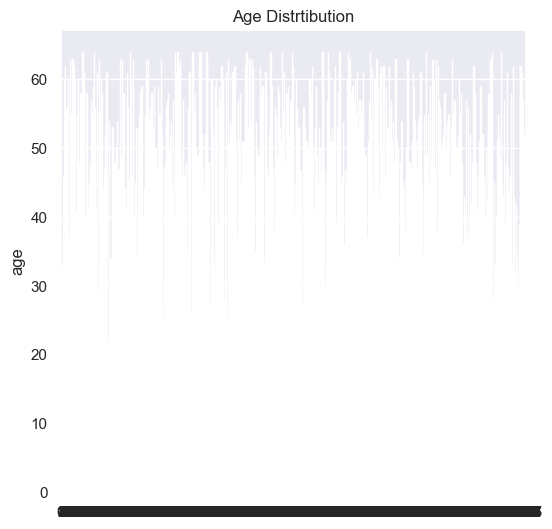

In [43]:
sns.set()
plt.figure(figsize=(8,8))
sns.distplot(df["age"])
plt.title("Age Distrtibution")
plt.show()

sex
male      676
female    662
Name: count, dtype: int64


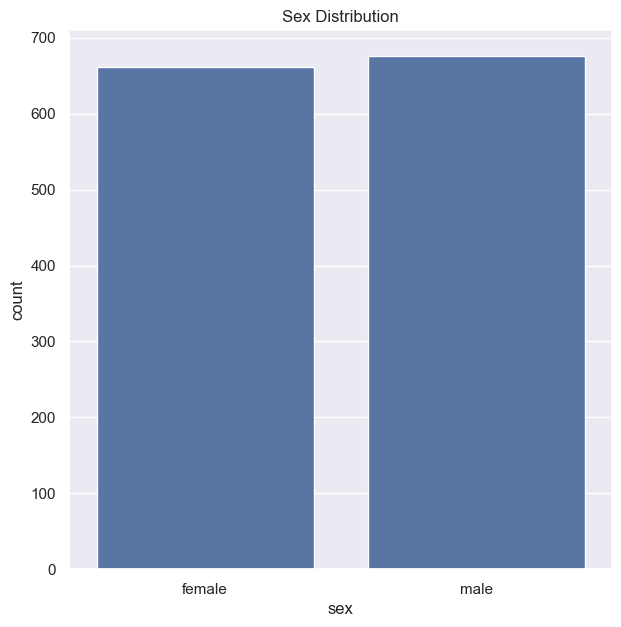

In [37]:
sex_count=df["sex"].value_counts()
print(sex_count)
plt.figure(figsize=(7,7))
sns.countplot(x="sex",data=df)
plt.title("Sex Distribution")
plt.show()



C:\Users\lalit\AppData\Local\Temp\ipykernel_8764\3052950765.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["bmi"])


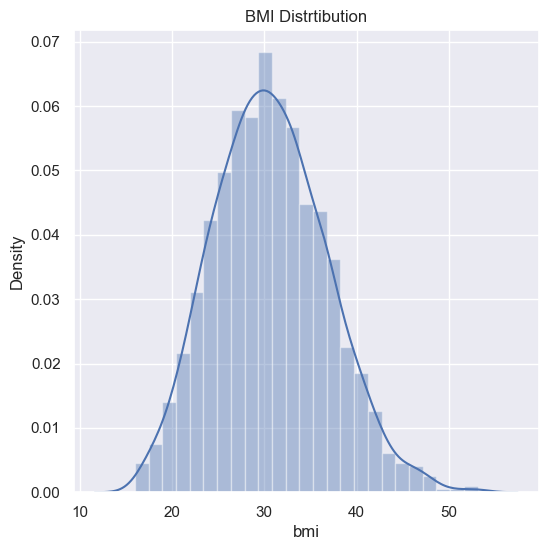

In [41]:
plt.figure(figsize=(6,6))
sns.distplot(df["bmi"])
plt.title("BMI Distrtibution")
plt.show()

Normal BMI Range ----> 18.5 to 24.9 , but here the peak stage is at above 25, so the persons in the dataset are overweight.